## Handwritten Digit Recognition

In [2]:

#Import required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import math

import tensorflow as tf
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
train=pd.read_csv(r'train.csv')
test=pd.read_csv(r'test.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.info(),
print("Shape: ", train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
Shape:  (42000, 785)


In [8]:
test.info(),
print("Shape: ", test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
Shape:  (28000, 784)


In [11]:
X=train.iloc[:, 1:785]
y=train.iloc[:, 0]

X_test=test.iloc[:, 0:784]

### Split data into train and test sets

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1212)

In [16]:
print('X_train: ', X_train.shape)
print('y_train: ', X_train.shape)
print('X_validation: ', X_val.shape)
print('y_validation: ', y_val.shape)

X_train:  (33600, 784)
y_train:  (33600, 784)
X_validation:  (8400, 784)
y_validation:  (8400,)


In [20]:

#Convert data into array

x_train_reshape=X_train.to_numpy().reshape(33600,28,28)

y_train_reshape=y_train.values

x_val_reshape=X_val.to_numpy().reshape(8400,28,28)

y_val_reshape=y_val.values

x_test_reshape=X_test.to_numpy().reshape(28000,28,28)

In [24]:
print('x_train: ', x_train_reshape.shape)
print('y_train: ', y_train_reshape.shape)
print('x_validation: ', x_val_reshape.shape)
print('y_validation: ', y_val_reshape.shape)
print('x_test: ',x_test_reshape.shape)

x_train:  (33600, 28, 28)
y_train:  (33600,)
x_validation:  (8400, 28, 28)
y_validation:  (8400,)
x_test:  (28000, 28, 28)


In [29]:
#Save image parameters to the constants

IMAGE_HEIGHT = 28
IMAGE_WIDTH = 28
IMAGE_CHANNELS = 1
IMAGE_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)
NUM_CLASSES = 10

(_, IMAGE_WIDTH, IMAGE_HEIGHT)=x_train_reshape.shape

print('Image width: ',IMAGE_WIDTH, '\nImage height: ',IMAGE_HEIGHT,'\nImage Channels',IMAGE_CHANNELS)


Image width:  28 
Image height:  28 
Image Channels 1


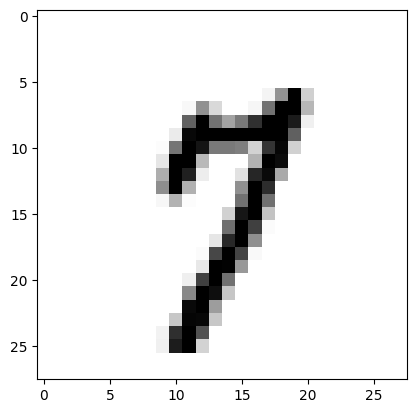

In [33]:
plt.imshow(x_train_reshape[3], cmap=plt.cm.binary)

plt.show()

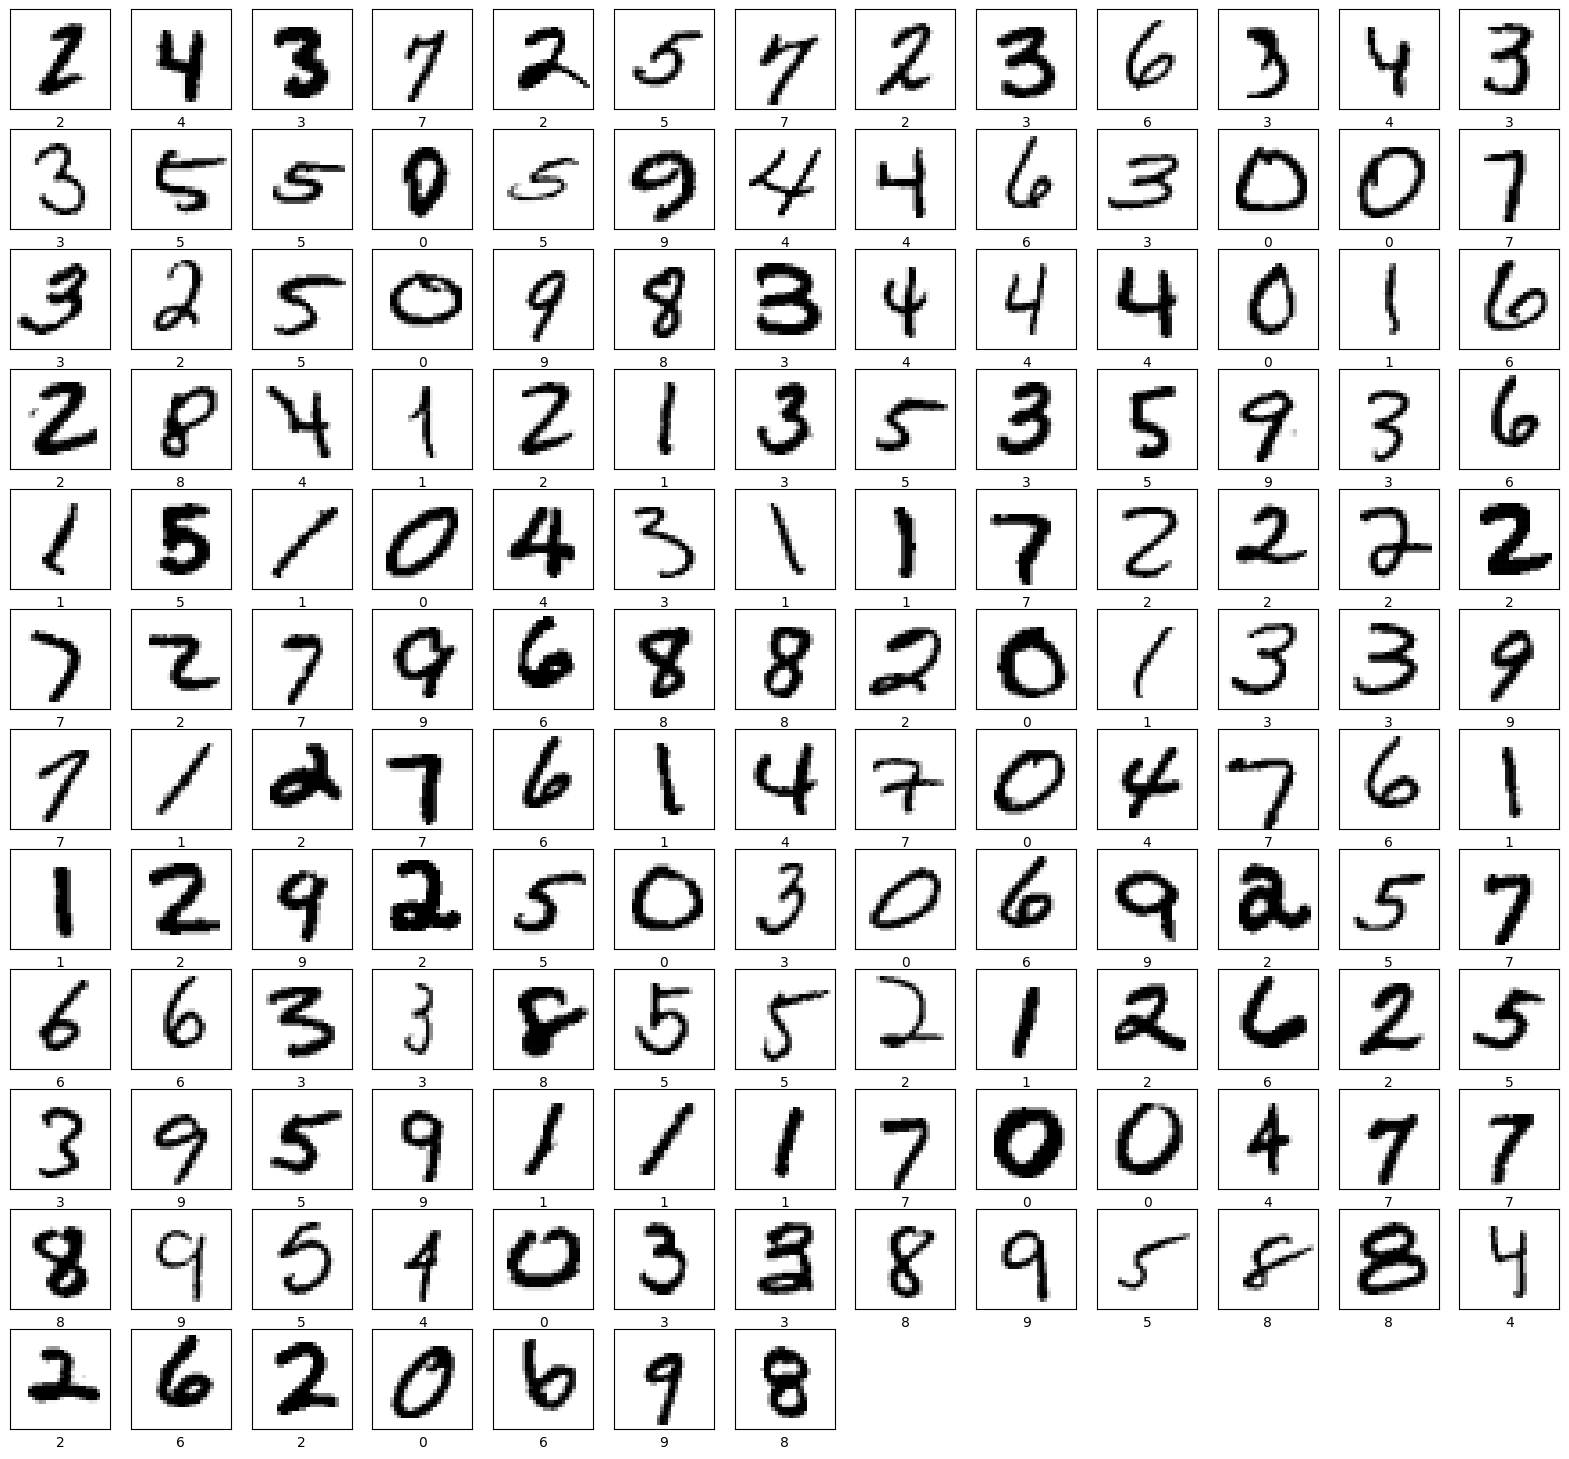

In [35]:

#Visualize the numbers

nos_to_display = 150
num_cells = math.ceil(math.sqrt(nos_to_display))
plt.figure(figsize=(20,20))
for i in range(nos_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_reshape[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_reshape[i])
plt.show()

### Reshape data

In [41]:

#Reshape train, test and validation data

x_train_channels = x_train_reshape.reshape(x_train_reshape.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

x_val_channels = x_val_reshape.reshape(x_val_reshape.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

x_test_channels = x_test_reshape.reshape(x_test_reshape.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

In [43]:
print('x_train_with_channels:', x_train_channels.shape)
print('x_validation_with_channels:', x_val_channels.shape)
print('x_test_with_channels:', x_test_channels.shape)

x_train_with_channels: (33600, 28, 28, 1)
x_validation_with_channels: (8400, 28, 28, 1)
x_test_with_channels: (28000, 28, 28, 1)


### Normalize data

In [44]:
x_train_normalize = x_train_channels / 255
x_validation_normalize = x_val_channels / 255
x_test_normalize = x_test_channels / 255

### CNN model architecture

In [46]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout 
from tensorflow.keras.initializers import VarianceScaling     

In [48]:

#CNN Model

model=Sequential()

model.add(Conv2D(input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS), kernel_size=5, filters=8, strides=1, activation='relu', kernel_initializer=VarianceScaling()))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(kernel_size=5, filters=16, strides=1, activation='relu', kernel_initializer=VarianceScaling()))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax', kernel_initializer=VarianceScaling()))
     


In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)              

### Train model

In [50]:
#Compile model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [51]:
history=model.fit(x_train_normalize, y_train_reshape, epochs=20, validation_data=(x_validation_normalize, y_val_reshape))

print('\n The model has been trained')

Epoch 1/20
1050/1050 [==============================] - 8s 3ms/step - loss: 0.2485 - accuracy: 0.9234 - val_loss: 0.0800 - val_accuracy: 0.9757
Epoch 2/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0857 - accuracy: 0.9734 - val_loss: 0.0516 - val_accuracy: 0.9846
Epoch 3/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0641 - accuracy: 0.9800 - val_loss: 0.0552 - val_accuracy: 0.9830
Epoch 4/20
1050/1050 [==============================] - 3s 2ms/step - loss: 0.0504 - accuracy: 0.9842 - val_loss: 0.0497 - val_accuracy: 0.9843
Epoch 5/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0420 - accuracy: 0.9866 - val_loss: 0.0516 - val_accuracy: 0.9842
Epoch 6/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0348 - accuracy: 0.9895 - val_loss: 0.0413 - val_accuracy: 0.9874
Epoch 7/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0459 - val_accuracy:

In [52]:
history.history

{'loss': [0.24846690893173218,
  0.0857413038611412,
  0.06413508206605911,
  0.050361160188913345,
  0.04198935255408287,
  0.034764986485242844,
  0.030360566452145576,
  0.025672106072306633,
  0.02523261308670044,
  0.02174755185842514,
  0.01874426193535328,
  0.01848328299820423,
  0.014623211696743965,
  0.015566722489893436,
  0.01274733617901802,
  0.01223335973918438,
  0.013118636794388294,
  0.011169372126460075,
  0.011488287709653378,
  0.008223751559853554],
 'accuracy': [0.9233928322792053,
  0.973422646522522,
  0.9799702167510986,
  0.98416668176651,
  0.9866071343421936,
  0.9895238280296326,
  0.9906250238418579,
  0.9915178418159485,
  0.9918452501296997,
  0.9926487803459167,
  0.9937797784805298,
  0.9937202334403992,
  0.9949702620506287,
  0.9944345355033875,
  0.9958928823471069,
  0.9958333373069763,
  0.9957440495491028,
  0.9962202310562134,
  0.9959821701049805,
  0.9970535635948181],
 'val_loss': [0.07999669760465622,
  0.051558058708906174,
  0.055233981

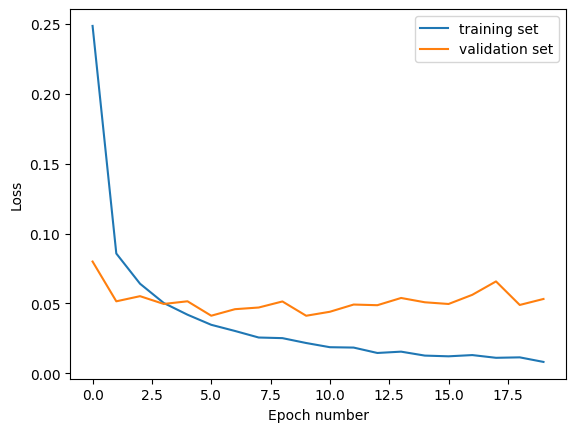

In [53]:
#Plot loss on each epoch

plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

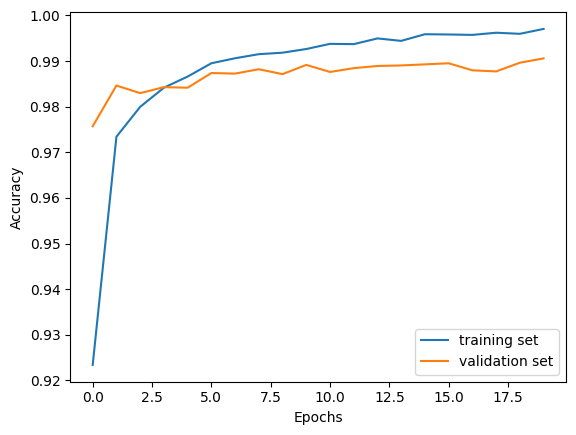

In [54]:

#Plot accuracy for each epoch

plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

### Test model 

In [56]:

#Model train

train_loss, train_accuracy = model.evaluate(x_train_normalize, y_train_reshape)

print('\n The model has been trained')

print('\n Train Loss: ', round(train_loss,2)*100,'%', '\n Train Accuracy: ', round(train_accuracy,2)*100,'%')

1050/1050 [==============================] - 3s 2ms/step - loss: 0.0022 - accuracy: 0.9994

 The model has been trained

 Train Loss:  0.0 % 
 Train Accuracy:  100.0 %


In [57]:
#Model Test

test_loss, test_accuracy = model.evaluate(x_validation_normalize, y_val_reshape)

print('\n The model has been tested')


print('\n Test Loss: ', round(test_loss,2)*100,'%', '\n Test Accuracy: ', round(test_accuracy,2)*100,'%')

263/263 [==============================] - 1s 3ms/step - loss: 0.0532 - accuracy: 0.9906

 The model has been tested

 Test Loss:  5.0 % 
 Test Accuracy:  99.0 %


In [58]:
#Save the model
model.save('digitsrecognition.h5')

### Load and Test the model

In [59]:
#Load model

model=tf.keras.models.load_model('digitsrecognition.h5')

In [60]:
predict_one_hot=model.predict([x_validation_normalize])
print('predict_one_hot: ', predict_one_hot.shape)

263/263 [==============================] - 1s 2ms/step
predict_one_hot:  (8400, 10)


In [61]:

#Predictions with highest probabilities and test digits recognized

predictions = np.argmax(predict_one_hot, axis=1)
pd.DataFrame(predictions, columns=['digit']).head()

,digit
0,1
1,3
2,8
3,1
4,9


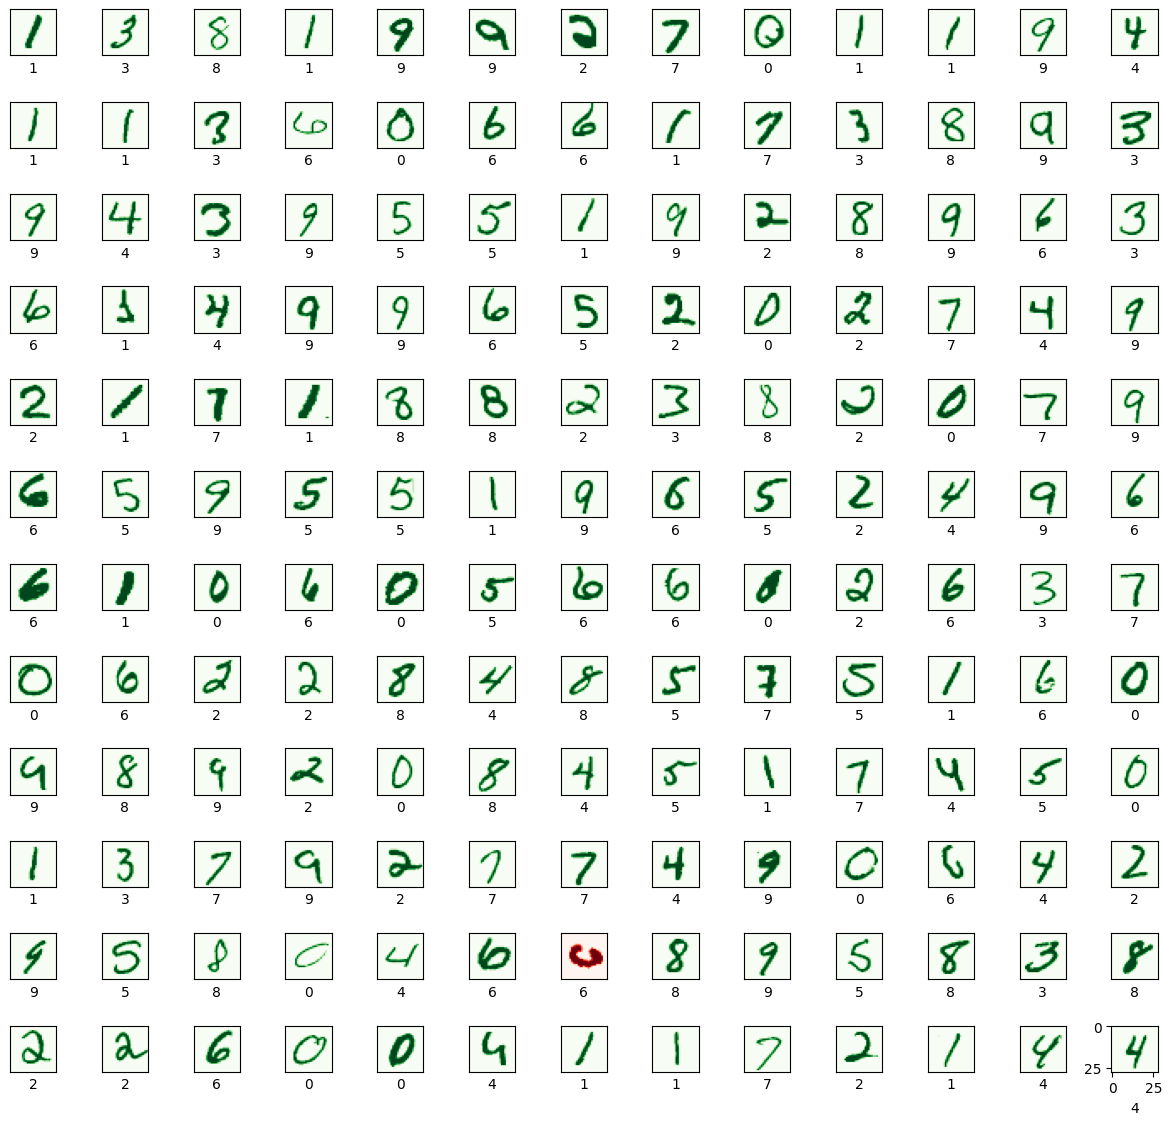

In [64]:

#Plot to test the prediction

numbers = 156
num_cells = math.ceil(math.sqrt(numbers))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_val_reshape[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalize[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()